<p>
    <b>Study Program:</b> Information Management (SS 22-23)<br>
    <b>Course:</b> 4IZ565 Data Science in Python and R<br>
    <b>Lecturers:</b> doc. Ing. Tomáš Kliegr and Ph.D., Ing. Lukáš Sýkora<br>
    <b>Team members:</b> Murad Shabanli and Irina Kovacova<br>
    <b>Run time:</b> 50 seconds
    
</p>

# Heart Failure Prediction 

## Introduction 

<p>
There is a wide consensus among medical researchers that a both statistically and clinically important relationship exists between high blood pressure, also known as hypertension, and an increased risk of heart disease. <a href="https://jamanetwork.com/journals/jamainternalmedicine/article-abstract/617106">Stamler et al. (1993)</a> prepared a comprehensive overview of population studies and clinical trials supporting a causal relationship. The data accrued for the 20 years preceding the study in the US showed conclusive evidence that both systolic and diastolic pressure were important and clinically significant predictors of a range of cardiovascular diseases including coronary heart diseases and stroke. High blood pressure was determined to be a major independent predictor of both incidence and mortality related to heart disease, even after controlling for other known risk factors. 
</p>
<p>
The study conducted by <a href="https://diabetesjournals.org/care/article/28/3/607/27666/Blood-Glucose-and-Heart-Failure-in-Nondiabetic">Christopher Nielson and Theodore Lange (2005)</a> concluded that higher glucose levels even in patients without the clinical diagnosis of diabetes are associated with higher heart failure risks. The researchers grouped the study participants into 4 categories based on their baseline glucose level (below 90 mg/dl, 90 to 99 mg/dl, 100 to 109 mg/dl and 110 to 126 mg/dl) and discovered that heart failure incidence increased progressively with increasing baseline glucose level. The study showed that non-diabetic patients with baseline glucose levels between 110 and 126 mg/dl had 83% higher prevalence of heart failure versus the group with baseline glucose level below 90 mg/dl. The study included a large sample of 20,810 non-diabetic patients and the results were statistically significant. The results of this study support the thesis that a positive correlation between blood sugar (glucose) level and heart diseases does exist.
</p>

## Description of the Dataset

<p>
<b>Context</b>
</p>

<p>
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
</p>

<p>
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

</p>

<p>
<b>Column names are:</b><br>
    <ul>
        <li><b>Age:</b> age of the patient [years]</li>
        <li><b>Sex:</b> sex of the patient [M: Male, F: Female]</li>
        <li><b>ChestPainType:</b> chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic</li>
        <li><b>RestingBP:</b> resting blood pressure [mm Hg]</li>
        <li><b>Cholesterol:</b> serum cholesterol [mm/dl]</li>
        <li><b>FastingBS:</b> fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
        <li><b>ARestingECGge:</b> resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave  inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
        <li><b>MaxHR:</b> maximum heart rate achieved [Numeric value between 60 and 202]</li>
        <li><b>ExerciseAngina:</b> exercise-induced angina [Y: Yes, N: No]</li>
        <li><b>Oldpeak:</b> oldpeak = ST [Numeric value measured in depression]</li>
        <li><b>ST_Slope:</b> the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
        <li><b>HeartDisease:</b> output class [1: heart disease, 0: Normal]</li> 
    </ul>
</p>

## Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
heart_failure_df = pd.read_csv("file.csv")

In [3]:
heart_failure_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploring the Dataset 

The dataset consists of 918 rows and 12 columns

In [4]:
heart_failure_df.shape

(918, 12)

The data types of each column are correct i.e. Pandas library correctly identified the numerical and non-numerical columns. Some of the non-numerical columns will be required to be converted into numerical representations so that the sklearn libraries can carry out the required operations

In [5]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Upon investigation we can see that there are no missing values for any of the columns.

In [6]:
heart_failure_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We can also confirm that there are no duplicated values in the dataframe

In [7]:
heart_failure_df.duplicated().value_counts()

False    918
dtype: int64

In order to understand the data distribution we will produce certain plots

## Data Preprocessing

Before starting to analyse the dataset it is important to identify the outliers in numerical columns and either remove them or to replace them with something more meaningful in order to prevent the machine learning model from producing unreliable results. The columns that need to be checked for outliers are "RestingBP", "Cholesterol",  "MaxHR" and "Oldpeak".

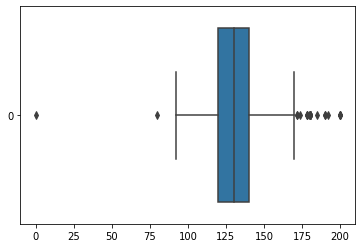

In [8]:
sns.boxplot(heart_failure_df["RestingBP"], orient="h")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

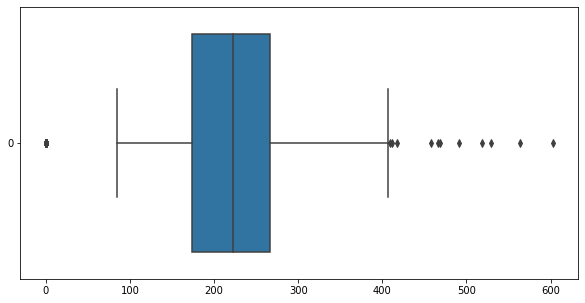

In [9]:
sns.boxplot(heart_failure_df["Cholesterol"], orient="h")
plt.show()

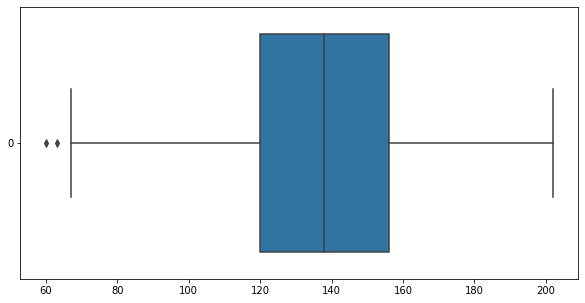

In [10]:
sns.boxplot(heart_failure_df["MaxHR"], orient="h")
plt.show()

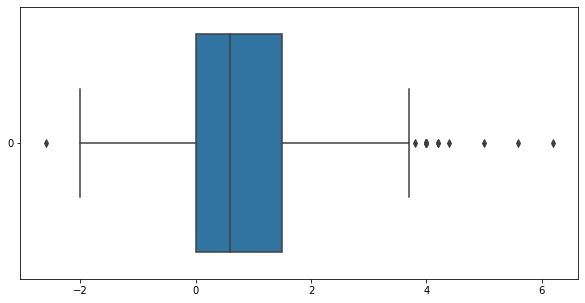

In [11]:
sns.boxplot(heart_failure_df["Oldpeak"], orient="h")
plt.show()

As can be seen from above graph all 4 of these features contain outliers which need to be cleaned. For the purpose of identification of the outliers, the <a href="https://www.geeksforgeeks.org/interquartile-range-iqr/">Inter Quartiel Range approach</a> will be utilised. We are going to remove the rows with no values or containing value of 0, and we are going to replace the other outlier with mean values of the same columns where the mean value will be calculated by using the aggregation function. Let's start with dropping the rows with zero values. The exception will be the numeric value measured during the depression (OldPeak) where 0 is a valid number.

However, it is important to understand which percentage of the dataset is being lost due to missing values. Let's calculate the percentage patients that do not have cholesterold measured:

In [12]:
chold_not_mes_count = heart_failure_df[heart_failure_df["Cholesterol"] == 0].shape[0] / heart_failure_df.shape[0]*100
print("{:.2f}% of the dataset does not have cholesterol values and will be dropped.".format(chold_not_mes_count))

18.74% of the dataset does not have cholesterol values and will be dropped.


In [13]:
chold_not_mes_count = heart_failure_df[heart_failure_df["RestingBP"] == 0].shape[0] / heart_failure_df.shape[0]*100
print("{:.2f}% of the dataset does not have resting blood pressure values and will be dropped.".format(chold_not_mes_count))

0.11% of the dataset does not have resting blood pressure values and will be dropped.


In [14]:
chold_not_mes_count = heart_failure_df[heart_failure_df["MaxHR"] == 0].shape[0] / heart_failure_df.shape[0]*100
print("{:.2f}% of the dataset have MaxHR values not measured. No need to drop the missing values for this column".format(chold_not_mes_count))

0.00% of the dataset have MaxHR values not measured. No need to drop the missing values for this column


In [15]:
three_feats_count = heart_failure_df[(heart_failure_df["RestingBP"] == 0) | 
                                     (heart_failure_df["Cholesterol"] == 0) | 
                                     (heart_failure_df["MaxHR"] == 0)].shape[0] / heart_failure_df.shape[0]*100
print("In total, {:.2f}% of the dataset will be dropped.".format(three_feats_count))

In total, 18.74% of the dataset will be dropped.


Apparently, the rows missing the cholesterold values also miss the resting blood pressure values. Therefore, the total percentge of the rows with missign values that will be dropped remains 18.74%

In [16]:
heart_failure_df_clean = heart_failure_df[(heart_failure_df["RestingBP"] != 0) & 
                                         (heart_failure_df["Cholesterol"] != 0) & 
                                         (heart_failure_df["MaxHR"] != 0)].copy()

In [17]:
print("The original dataset consisted of {} rows and {} rows remain after getting rid of the ones with missing values".format(heart_failure_df.shape[0], heart_failure_df_clean.shape[0]))

The original dataset consisted of 918 rows and 746 rows remain after getting rid of the ones with missing values


Now let's identify the remaining outliers and replace them with mean values to imporve the performance of the machine learning algorithms that we are going to use. The function below is developed to identify the rows with outliers.

In [18]:
def detect_outliers(df, *cols):
    outliers_list = []
    for col in cols[0]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        not_outlier_interval = (df[col] >= lower_bound) & (df[col] <= upper_bound) 
        outliers_indeces = df[~not_outlier_interval].index.to_list()
        if outliers_indeces:
            outliers_list.extend(outliers_indeces)
    df_outliers = df.loc[outliers_list, :]
    return df_outliers

The function below replaces the outliers of each column with the mean value of the column.

In [19]:
def replace_with_mean(df, df_outliers, df_not_outliers, *cols):
    for col in cols[0]:
        df.loc[df_outliers[df_outliers["HeartDisease"] == 0].index, col] = round(df_not_outliers.loc[df_not_outliers[df_not_outliers["HeartDisease"] == 0].index, col].mean())
        df.loc[df_outliers[df_outliers["HeartDisease"] == 1].index, col] = round(df_not_outliers.loc[df_not_outliers[df_not_outliers["HeartDisease"] == 1].index, col].mean())
    return

Let's use the detect_outliers() function to identify the outliers in columns "RestingBP", "Cholesterol",  "MaxHR" and Oldpeak". 

In [20]:
df_outliers = detect_outliers(heart_failure_df_clean, ["RestingBP", "Cholesterol",  "MaxHR", "Oldpeak"])
df_not_outliers = heart_failure_df_clean.drop(df_outliers.index)

In [21]:
df_outliers.shape

(58, 12)

As can be seen from above line 58 rows with outliers were identified. We are going to run replace_with_mean() function to replace the outliers in those columns with respective mean values. 

It is important to ensure that the outliers are replaced with abnormal values. This will be crucial when creating new columns. For example, if we are creating a new column where people with increased cholesterol are marked as 1 and the ones with normal cholesterol are marked as 0, it will be misleading if we replaced the outliers in cholesterol column with mean values that are within the normal range. This will be important for two specific columns: Cholesterol and RestingBP

In order to ensure that this problem does not persist we need to look at the mean values of each column.

In [22]:
round(heart_failure_df_clean["RestingBP"].mean())

133

<a href="https://www.cdc.gov/bloodpressure/about.htm#:~:text=%2F80%20mmHg.%E2%80%9D-,What%20are%20normal%20blood%20pressure%20numbers%3F,less%20than%20120%2F80%20mmHg.&text=No%20matter%20your%20age%2C%20you,pressure%20in%20a%20healthy%20range.">Healthy resting blood pressure is 120/80 mmHg</a>. The mean value for that column is 133 mmHg which is above the normal range. So in restingBP column the outliers will be replaced with a value that is above the normal range.

In [23]:
round(heart_failure_df_clean["Cholesterol"].mean())

245

<a href="https://www.ncbi.nlm.nih.gov/books/NBK279318/#:~:text=The%20following%20levels%20are%20considered,1.3%20mmol%2FL)%20in%20women">The normal cholesterol levels are between 125 and 200 mm/dl</a>. The mean value for the Cholesterol column is 244 mm/dl which as above the normal range. Hence the outliers in Cholesterol column will be replaced with values above the normal range.

In [24]:
replace_with_mean(heart_failure_df_clean, df_outliers, df_not_outliers, ["RestingBP", "Cholesterol",  "MaxHR", "Oldpeak"])

Now that the outliers have been replaced with mean values, let's plot the boxplots again for each of these columns to see if any zero values or outliers are still present

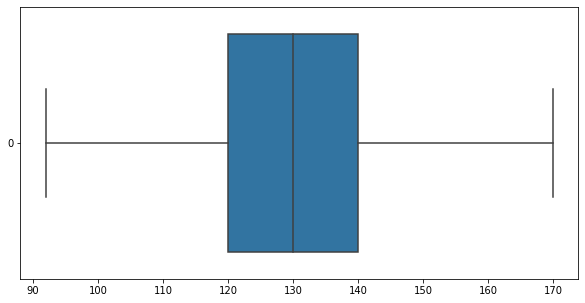

In [25]:
sns.boxplot(heart_failure_df_clean["RestingBP"], orient="h")
plt.show()

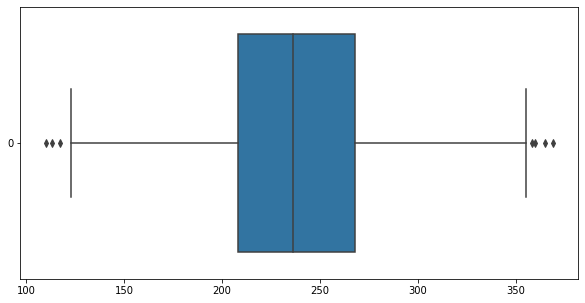

In [26]:
sns.boxplot(heart_failure_df_clean["Cholesterol"], orient="h")
plt.show()

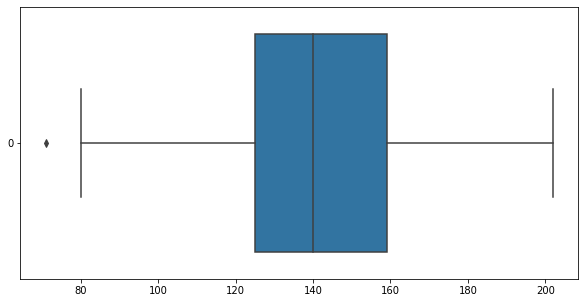

In [27]:
sns.boxplot(heart_failure_df_clean["MaxHR"], orient="h")
plt.show()

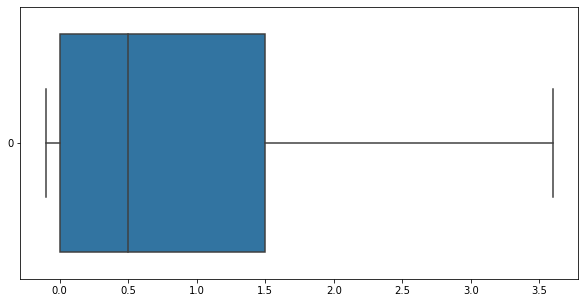

In [28]:
sns.boxplot(heart_failure_df_clean["Oldpeak"], orient="h")
plt.show()

<p> We successfully carried out the pre-rpocessing of the dataset by:
    <ul>
        <li>Removing the rows with 0 values for "RestingBP", "Cholesterol" and "MaxHR" columns.</li>
        <li> Replacing the excessively large and small values (i.e. outliers) with mean value for "RestingBP", "Cholesterol",  "MaxHR" and "Oldpeak" columns respectively.</li>
    </ul>
    The outcome of the pre-processing was validated with boxplots. Next we are going to carry out eploratory data analyzes to create some basic understanding of dataset.
</p>

## Explaratory Data Analysis 

Before starting the EDA section, the column names are renamed so that they look better in plots.

In [29]:
heart_failure_df_clean.rename({"ChestPainType": "Chest Pain Type",
                               "FastingBS": "Fasting Blood Sugar",
                               "HeartDisease": "Heart Disease",
                               "RestingBP": "Resting Blood Pressure"},
                               axis=1,
                               inplace=True)

### Overall Correlation Between Different Features 

First we are going to plot the pairplot which illustrates the correlation between all the columns.

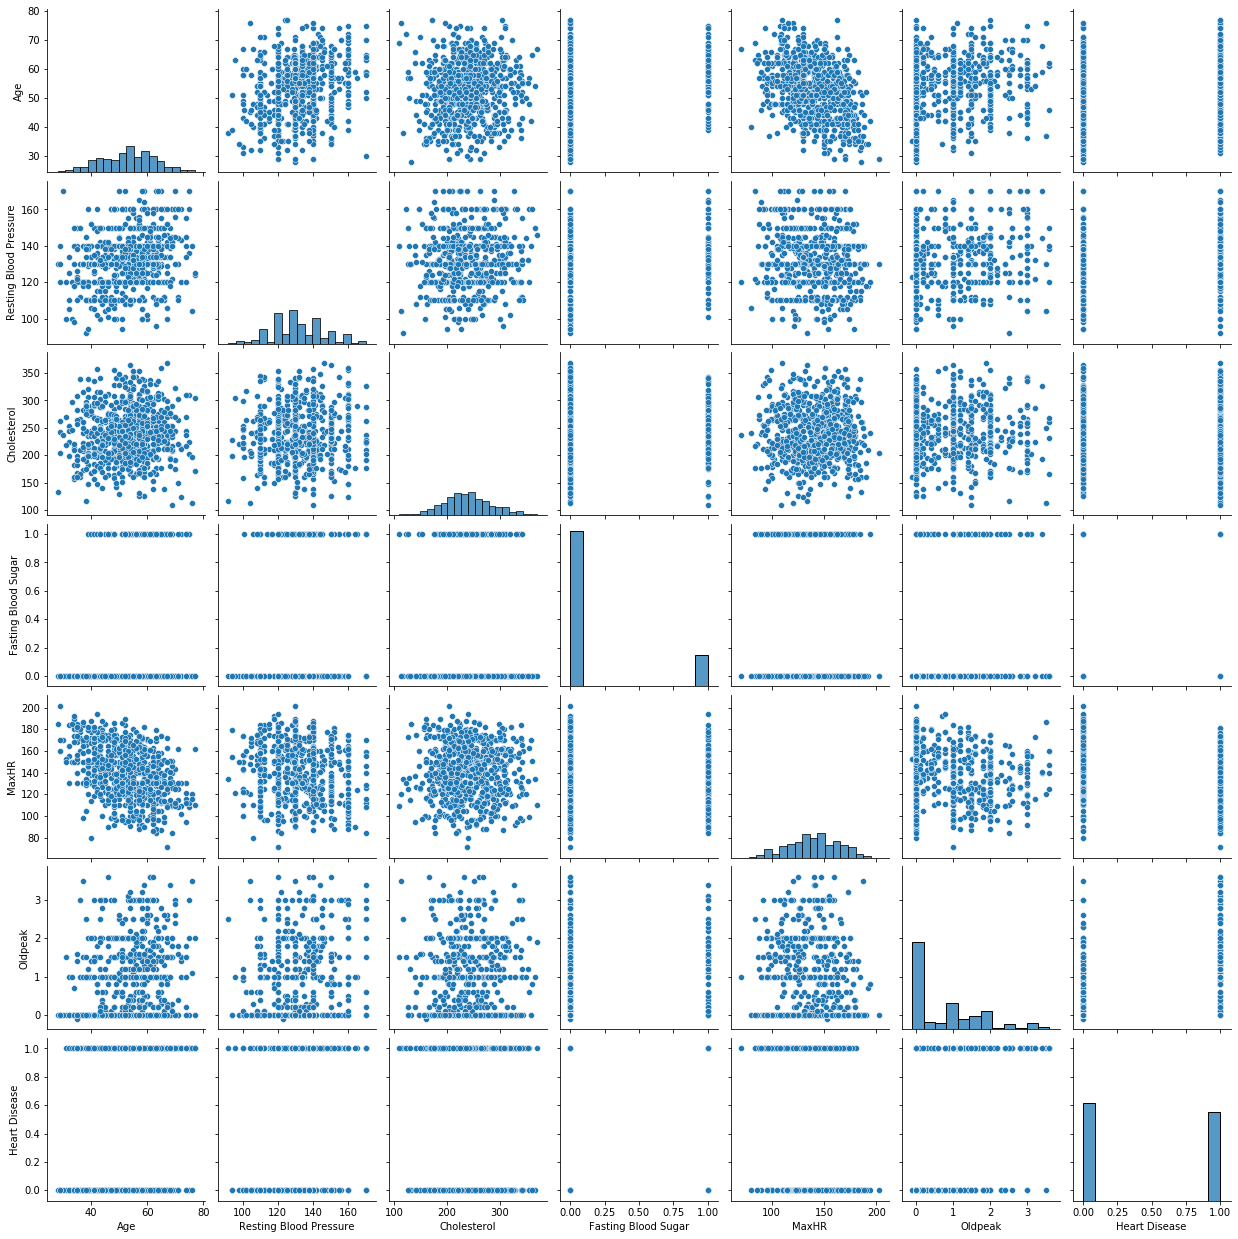

In [30]:
sns.pairplot(data=heart_failure_df_clean)
plt.show()

### Sex Distribution of the Surveyors

The sex ditrbution of the patients is unequal, with men being the majority.

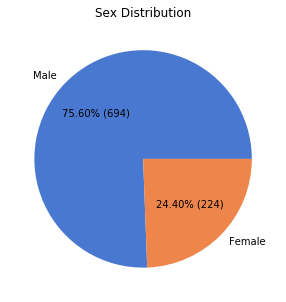

<Figure size 1440x2160 with 0 Axes>

In [31]:
male = heart_failure_df_clean[heart_failure_df_clean["Sex"] == "M"].shape[0]
female = heart_failure_df_clean[heart_failure_df_clean["Sex"] == "F"].shape[0]
colors = sns.color_palette('muted')[0:5]
total = heart_failure_df_clean.shape[0]
plt.pie([male, female], labels=["Male", "Female"], 
        autopct=lambda x: "{:.2f}% ({:.0f})".format(x, np.round(918*x/100)),
       colors=colors)
plt.title("Sex Distribution")
plt.figure(figsize=(20, 30))
plt.show()

### Cholesterol Levels 

First let's examine if everyone in dataset have cholesterol levels measured.

<a href="https://www.ncbi.nlm.nih.gov/books/NBK279318/#:~:text=The%20following%20levels%20are%20considered,1.3%20mmol%2FL)%20in%20women">The normal cholesterol levels are between 125 and 200 mm/dl</a>. 
Let's create a method that will take the cholesterol level and return 0 if it is outside of the normal range and 1 if it is not. We will use this method with apply method to create a new column called Abnormal Cholesterol where 1 means that the patient has an abnormal cholesterol while 0 means not.

In [32]:
def cholesterol_checker(chol):
    if chol >= 125 and chol <= 200:
        return 0
    else:
        return 1

In [33]:
heart_failure_df_clean["Abnormal Cholesterol"] = heart_failure_df_clean["Cholesterol"].apply(cholesterol_checker)
heart_failure_df_clean.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Heart Disease,Abnormal Cholesterol
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0


Now let's examine the effects of cholesterol on heart diseases. As mentioned above normal cholesterol levels range for men and women is between 125 and 200 mm/dl. If we incorporate that into our graph where people with normal cholesterol values are marked in blue while the ones above or below the normal range are marked as red we can see that majority of the people with heart diseases are above the normal range. We are also going to mark people with heart disease with big a circle and people with no heart disease with small circle.

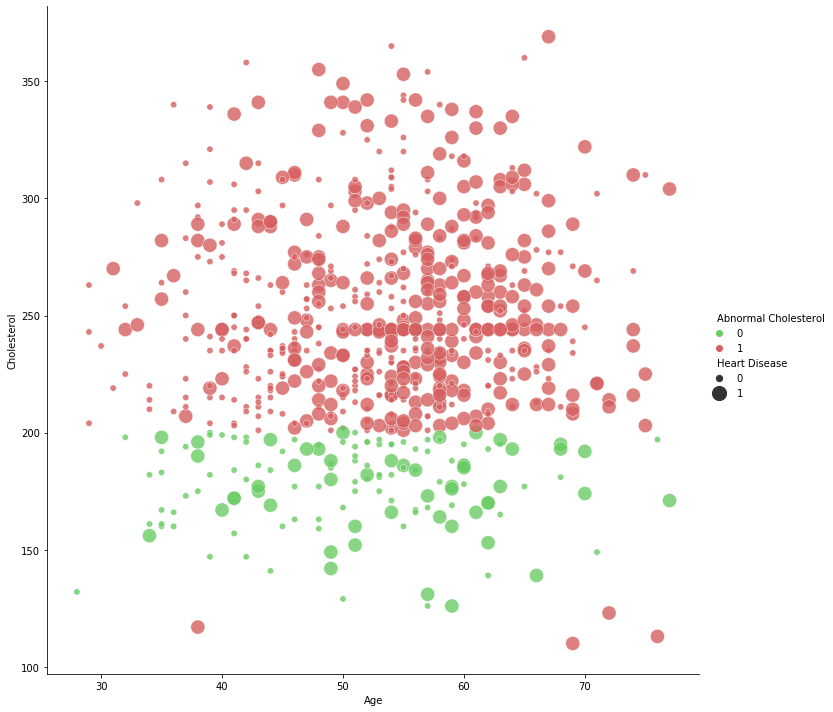

In [34]:
muted_colors = sns.color_palette("muted")
g = sns.relplot(x="Age", y="Cholesterol", hue="Abnormal Cholesterol", hue_order=[0, 1], size="Heart Disease", sizes=(200, 40), 
            alpha=.8, palette=[muted_colors[2], muted_colors[3]], height=10, data=heart_failure_df_clean, legend="full")
plt.show()

Let's put things into the numbers. For example, let's see what percentage of patients with heart disease have abnormal cholesterol.

In [35]:
norm_chol_sick_count = heart_failure_df_clean[(heart_failure_df_clean["Abnormal Cholesterol"] == 0) & (heart_failure_df_clean["Heart Disease"] == 1)].shape[0] # People with normal cholesterol and sick
abnorm_chol_sick_count = heart_failure_df_clean[(heart_failure_df_clean["Abnormal Cholesterol"] == 1) & (heart_failure_df_clean["Heart Disease"] == 1)].shape[0] # People with abnormal cholesterol and sick
total_norm_count = heart_failure_df_clean[heart_failure_df_clean["Abnormal Cholesterol"] == 0].shape[0] # Total number of people with normal cholesterol
total_abnorm_count = heart_failure_df_clean[heart_failure_df_clean["Abnormal Cholesterol"] == 1].shape[0] # Total number of people with abnormal cholesterol

norm_chol_sick_perc = norm_chol_sick_count / total_norm_count * 100

abnorm_chol_healthy_perc = abnorm_chol_sick_count / total_abnorm_count * 100

In [36]:
print("{:.2f}% of people with high cholesterol suffer from heart disease versus {:.2f}% of people with normal cholesterol suffer from heart disease. In other words, having abnormal cholesterol levels increases the chances of having a heart disease by 32 %".format(abnorm_chol_healthy_perc, norm_chol_sick_perc))

50.25% of people with high cholesterol suffer from heart disease versus 36.69% of people with normal cholesterol suffer from heart disease. In other words, having abnormal cholesterol levels increases the chances of having a heart disease by 32 %


In [37]:
abnorm_chol_perc = heart_failure_df_clean[(heart_failure_df_clean["Abnormal Cholesterol"] == 1) & (heart_failure_df_clean["Heart Disease"] == 1)].shape[0] / heart_failure_df_clean[heart_failure_df_clean["Heart Disease"] == 1].shape[0] * 100
print("Percentage of people with abnormal cholesterol levels in dataset: {:.2f}%".format(abnorm_chol_perc))

Percentage of people with abnormal cholesterol levels in dataset: 85.67%


For curiosity I would also like to understand the sex distribution of patients with hear disease. Therefore, in graph below women are marked in red and men in blue. We can see that both women and men are equally distributed even though women make only 21% of the dataset

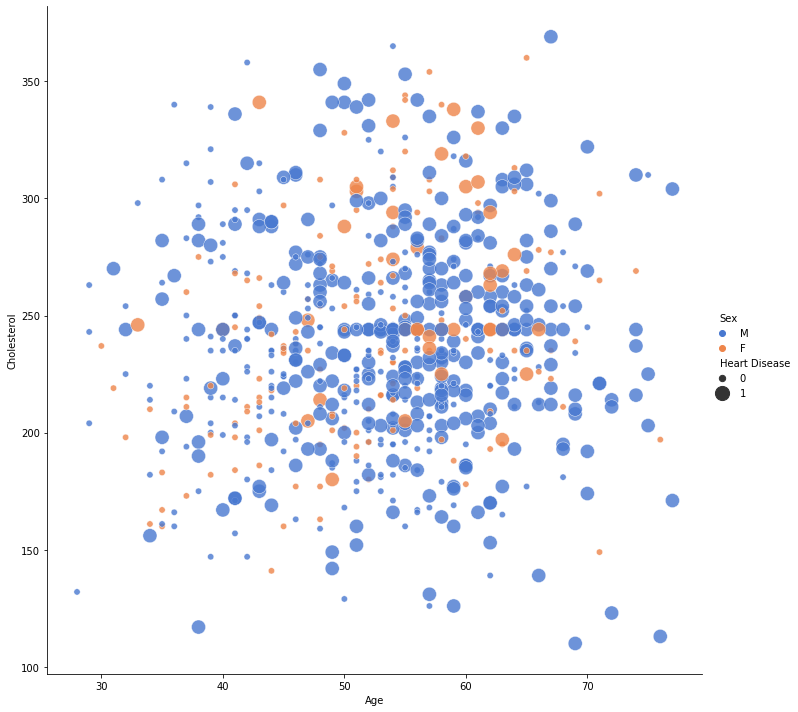

In [38]:
sns.relplot(x="Age", y="Cholesterol", hue="Sex", size="Heart Disease", sizes=(200, 40), 
            alpha=.8, palette="muted", height=10, data=heart_failure_df_clean)
plt.show()

### Chest Pain Distribution

As we can see from the graph below the majority of the patients with heart disease have aymptomatic chest pain i.e. either no pain at all or the pain that does not fall into medically known categories.

<b>Distribution based on sex<b>

In [39]:
chest_pain_group = heart_failure_df_clean.groupby(["Sex", "Chest Pain Type"])["Heart Disease"].count().reset_index()

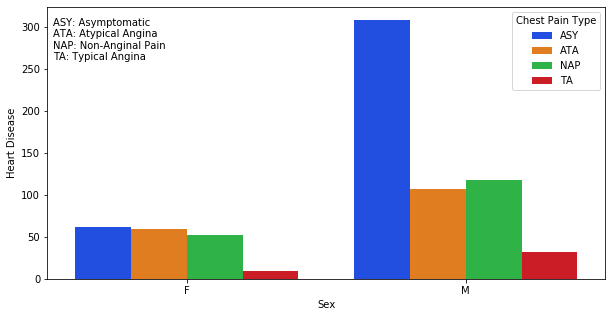

In [40]:
bright_colors = sns.color_palette("bright")
sns.barplot(data=chest_pain_group,
           x="Sex",
           y="Heart Disease",
           hue="Chest Pain Type",
           palette="bright")
plt.text(x=-0.48, y=260, s="ASY: Asymptomatic \nATA: Atypical Angina \nNAP: Non-Anginal Pain \nTA: Typical Angina")
plt.show()

### Resting Blood Pressure 

<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5059018/">Resting blood pressure is another known factor to contribute to the heart disease.</a> 

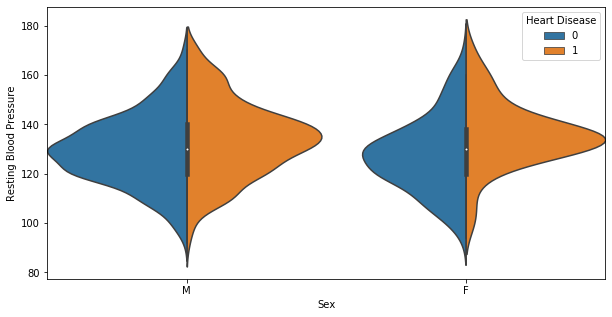

In [41]:
sns.violinplot(x="Sex", y="Resting Blood Pressure", hue="Heart Disease", data=heart_failure_df_clean, size=10, split=True, width=1)
plt.ylabel("Resting Blood Pressure")
plt.legend(title="Heart Disease")
plt.show()

As can be seen from the violinplot above people with heartdisease have higher resting blood pressure both for men and women.

### Fasting Blood Sugar 

Now let's examine the correlation between the resting blood pressure and heart disease

In [42]:
blood_sugar_group = heart_failure_df_clean.groupby(["Sex", "Fasting Blood Sugar", "Heart Disease"])
blood_sugar_group_df = blood_sugar_group.size().to_frame().reset_index()
blood_sugar_group_df.rename({0: "Count"}, axis=1, inplace=True)
blood_sugar_group_df["Group"] = ["Female Non-Diabetic", "Female Non-Diabetic" , "Female Diabetic", "Female Diabetic", "Male Non-Diabetic", "Male Non-Diabetic", "Male Diabetic", "Male Diabetic"]
blood_sugar_group_df

,Sex,Fasting Blood Sugar,Heart Disease,Count,Group
0,F,0,0,132,Female Non-Diabetic
1,F,0,1,31,Female Non-Diabetic
2,F,1,0,10,Female Diabetic
3,F,1,1,9,Female Diabetic
4,M,0,0,215,Male Non-Diabetic
5,M,0,1,243,Male Non-Diabetic
6,M,1,0,33,Male Diabetic
7,M,1,1,73,Male Diabetic


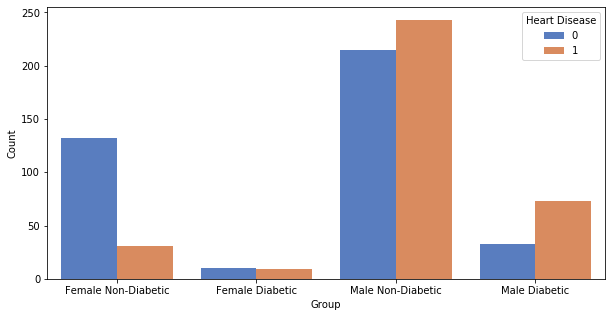

In [43]:
sns.barplot(x="Group", y="Count", hue="Heart Disease", data=blood_sugar_group_df, palette="muted")
plt.show()

The pattern that can be extracted from this plot is that both for men and women the blood sugar alone is not correlated with heart disease. For females regardless whether they have elevated fasting blood sugar or not, majority of them do not have heart diseases. However, for men, the picture is opposite - regardless whether men have elevated fasting blood sugar or not majority of them have heart diseases.

Now, let's build some classification models that will help us to identify the heart disease based on given features.

## Modeling

### Transformation

#### Importing Libraries 

In [44]:
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [45]:
heart_failure_df_clean.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Heart Disease,Abnormal Cholesterol
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0


#### Separating into Train and Test Sets

<p>Before starting the transformation adn prediction following steps need to be carried out:
    <ul>
        <li>The feature columns' data types will be casted from "object" to "categorical."</li>
        <li>The data is going to be split into features, X, and target variables, y.</li>
        <li>Features, X, and target variables, y, will be split into training and test sets. </li>
    </ul>
Let's start with the data type casting of the "object" type columns into "categorical" type. The table below shows the list of columns and their data types.
 </p>

In [46]:
heart_failure_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     746 non-null    int64  
 1   Sex                     746 non-null    object 
 2   Chest Pain Type         746 non-null    object 
 3   Resting Blood Pressure  746 non-null    int64  
 4   Cholesterol             746 non-null    int64  
 5   Fasting Blood Sugar     746 non-null    int64  
 6   RestingECG              746 non-null    object 
 7   MaxHR                   746 non-null    int64  
 8   ExerciseAngina          746 non-null    object 
 9   Oldpeak                 746 non-null    float64
 10  ST_Slope                746 non-null    object 
 11  Heart Disease           746 non-null    int64  
 12  Abnormal Cholesterol    746 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 101.6+ KB


Now, let's convert the columns with "object" data types into "categorical" data type.

In [47]:
heart_failure_df_clean["Chest Pain Type"] = heart_failure_df_clean["Chest Pain Type"].astype("category")
heart_failure_df_clean["RestingECG"] = heart_failure_df_clean["RestingECG"].astype("category")
heart_failure_df_clean["ST_Slope"] = heart_failure_df_clean["ST_Slope"].astype("category")
heart_failure_df_clean["ExerciseAngina"] = heart_failure_df_clean["ExerciseAngina"].astype("category")
heart_failure_df_clean["Sex"] = heart_failure_df_clean["Sex"].astype("category")

In order to confirm that the conversion was successful creating the same table again:

In [48]:
heart_failure_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     746 non-null    int64   
 1   Sex                     746 non-null    category
 2   Chest Pain Type         746 non-null    category
 3   Resting Blood Pressure  746 non-null    int64   
 4   Cholesterol             746 non-null    int64   
 5   Fasting Blood Sugar     746 non-null    int64   
 6   RestingECG              746 non-null    category
 7   MaxHR                   746 non-null    int64   
 8   ExerciseAngina          746 non-null    category
 9   Oldpeak                 746 non-null    float64 
 10  ST_Slope                746 non-null    category
 11  Heart Disease           746 non-null    int64   
 12  Abnormal Cholesterol    746 non-null    int64   
dtypes: category(5), float64(1), int64(7)
memory usage: 76.7 KB


Now, let's split the data into features, X, and target variables, y:

In [49]:
X = heart_failure_df_clean.drop("Heart Disease", axis=1)
y = heart_failure_df_clean["Heart Disease"]

Next, the data is going to be split into training and test datasets with test dataset being 20% of the whole dataset. In order to make the whole splitting process replicable the random_state will be set to the default value of 42.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Encoding Cateogrical Features 

As can be observed, there are both categorical and numerical features in the dataset. Categorical features are Sex, Chest Pain Type, RestingECG and ST_slope and numerical features are Age, Resting Blood Pressure, Cholesterol, Fasting Blood Sugar, MaxHR, Oldpeak, Heart Disease. 

Because machine learning algorithms can only work with numeric values and not with words or letters, we need to replace the categorical values with numerical values.

##### Ordinal Encoding 

The male and female labels in Sex column, and yes and no labels in ExerciseAngina column will be replaced using the ordinal encoding. 

In [51]:
transformer_name_oe = "oe"
transformer_oe = OrdinalEncoder()
columns_to_encode_oe = ["Sex","ExerciseAngina"]

##### One Hot Encoding 

The remaining of the categorical features which contain more than binary values, One Hot Encoder will be utilised to conversion. The reason for not using the ordinal encoding is that it creates a kind of a order or hieararchy of the categorical values, hence the name ordinal. For example, if the ordinal encoding is used for Chest Pain Type column, then the encoding will be as follows: ATA:0, NAP:1, ASY:2, TA:3. This in turn will mean that 2 times ATA (i.e. 1) equals to ASY (i.e. 2), or 1 (i.e. NAP) + 2 (i.e. ASY) = 3 (i.e. TA). Obviously this is not correct. In order to avoid this one hot encoder will be utilized to create a separate column for each of the categorical values where each column will have binary values (i.e. 0 and 1).

Because the dataset consists of categorical and numerical features, the ColumnTransformer will be utilized where it is possible to indicate which specific columns need to be one hot encoded.

In [52]:
transformer_name_ohe = "ohe"
transformer_ohe = OneHotEncoder(sparse=False)
columns_to_encode_ohe = ["Chest Pain Type", "RestingECG", "ST_Slope"]

#### Binning Numerical Features

As can be observed from the dataset different numerical features contain values with different ranges. The columns that need binning are Age, Resting Blood Pressure, Cholesterol and MaxHR.

In [53]:
transformer_name_bin = "bin"
transformer_bin = KBinsDiscretizer(n_bins=5, encode="onehot")
columns_to_encode_bin = ["Resting Blood Pressure", "Cholesterol", "MaxHR"]

##### Pipeline 

In order to simplify the whole process of transforming the dataset matrix and plugging in the transformed matrix into another transformer in right order, the Pipeline class will be utilized. This class takes the transformers and a predictor and runs them in defined order thus ensuring that the training and testing sets are subject to the same transformations. Also the ColumnTransfer class will be used to define for Sklearn which columns need to be one hot encoded, which ones ordinal encoded and which ones binned.

In [54]:
col_transform = ColumnTransformer([(transformer_name_oe, transformer_oe, columns_to_encode_oe),
                                    (transformer_name_ohe, transformer_ohe, columns_to_encode_ohe),
                                    (transformer_name_bin, transformer_bin, columns_to_encode_bin)],
                                     remainder="passthrough")

Pipeline([("column_transformer", col_transform)])

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                   

### Prediction 

4 classification models will be used to predict whether the patient has a heart disease or not: K-Nearest Neighbors, Decision Tree, Random Forest Tree and Logistic Regression. GridSearchCV will be utilized for all of them to identify the best hyperparameters. Once the models have been trained, their AUCs will be compared to find out the best performing classification model.

#### K-Nearest Neighbors Classifier 

In [55]:
knn = KNeighborsClassifier()
params = {"n_neighbors": [1, 10, 100],
          "weights":["uniform", "distance"],
          "p":[1, 2],
          "leaf_size": [1, 10, 100]}
cv = 10
n_jobs = 2
knn_gs = GridSearchCV(estimator=knn, param_grid=params, cv=10, n_jobs=2, scoring="precision")

In [56]:
knn_pipe = Pipeline([("column_transformer", col_transform),
                     ("knn_gs", knn_gs)])

In [57]:
knn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknow...
                              estimator=KN

Let's see what are the best parameters that the GridSearchCV identified for this model from given range:

In [58]:
knn_pipe.named_steps["knn_gs"].best_params_

{'leaf_size': 100, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

Because the initial range of the parameters were given in logorithmic order to identify the sweet spot, another run of gridsearchCV

In [59]:
knn = KNeighborsClassifier()
params = {"n_neighbors": range(5, 15),
          "weights":["uniform", "distance"],
          "p":[1, 2],
          "leaf_size": range(90, 120)}
cv = 10
n_jobs = 2
knn_gs = GridSearchCV(estimator=knn, param_grid=params, cv=10, n_jobs=2, scoring="precision")

In [60]:
knn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknow...
                              estimator=KN

In [61]:
knn_pipe.named_steps["knn_gs"].best_params_

{'leaf_size': 100, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

The best parameters remain the same, which means that these are really the best parameters.

In [62]:
y_pred_knn = knn_pipe.predict(X_test)

In [63]:
knn_pipe.score(X_test, y_test)

0.9078947368421053

#### Decision Tree

In [64]:
dt = DecisionTreeClassifier()
params = {"random_state": [42],
          "max_depth": [1, 10, 20],
          "min_samples_leaf": [1, 10, 100]}
cv = 10
n_jobs = 2
dt_gs = GridSearchCV(estimator=dt, param_grid=params, cv=10, n_jobs=2, scoring="precision")

In [65]:
dt_pipe = Pipeline([("column_transformer", col_transform),
                     ("dt_gs", dt_gs)])

In [66]:
dt_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknow...
                                          

In [67]:
dt_pipe.named_steps["dt_gs"].best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'random_state': 42}

In [68]:
dt = DecisionTreeClassifier()
params = {"random_state": [42],
          "max_depth": range(5, 15),
          "min_samples_leaf": range(5, 15)}
cv = 10
n_jobs = 2
dt_gs = GridSearchCV(estimator=dt, param_grid=params, cv=10, n_jobs=2, scoring="precision")

In [69]:
dt_pipe = Pipeline([("column_transformer", col_transform),
                     ("dt_gs", dt_gs)])

In [70]:
dt_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknow...
                                          

In [71]:
dt_pipe.named_steps["dt_gs"].best_params_

{'max_depth': 9, 'min_samples_leaf': 6, 'random_state': 42}

In [72]:
y_pred_dt = dt_pipe.predict(X_test)

#### Random Forest Tree 

In [73]:
rf = RandomForestClassifier()
params = {"random_state": [22],
          "n_estimators": [1, 10, 100],
          "max_depth": [1, 10, 20]}
cv = 10
n_jobs = 2
rf_gs = GridSearchCV(estimator=rf, param_grid=params, cv=10, n_jobs=2, scoring="precision")

In [74]:
rf_pipe = Pipeline([("column_transformer", col_transform),
                     ("rf_gs", rf_gs)])

In [75]:
rf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknow...
                                          

In [76]:
rf_pipe.named_steps["rf_gs"].best_params_

{'max_depth': 10, 'n_estimators': 100, 'random_state': 22}

The selected hyperparameters indicate the logarithmic scale at which we need to do further exploring:

In [77]:
rf = RandomForestClassifier()
params = {"random_state": [22],
          "n_estimators": [70, 80, 90, 100],
          "max_depth": [10, 12, 14, 16, 18]}
cv = 10
n_jobs = 2
rf_gs = GridSearchCV(estimator=rf, param_grid=params, cv=10, n_jobs=2, scoring="precision")

In [78]:
rf_pipe = Pipeline([("column_transformer", col_transform),
                     ("rf_gs", rf_gs)])

In [79]:
rf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknow...
                                          

In [80]:
rf_pipe.named_steps["rf_gs"].best_params_

{'max_depth': 16, 'n_estimators': 80, 'random_state': 22}

This time the best parameters are chosen from the middle of the given ranges which indicates that there is no need for further exploration of correct parameters. 

#### Logistic Regression 

In [81]:
lr = LogisticRegression()
params = {"max_iter": [10000],    
          "penalty": ["l1", "l2", "elasticnet"],
          "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
cv = 10
n_jobs = 2
lr_gs = GridSearchCV(estimator=lr, param_grid=params, cv=10, n_jobs=2, scoring="precision")

In [82]:
lr_pipe = Pipeline([("column_transformer", col_transform),
                     ("lr_gs", lr_gs)])

In [83]:
lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknow...
                                          

In [84]:
lr_pipe.named_steps["lr_gs"].best_params_

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'sag'}

## Results And Evlatuation

In this section the evaluation of the models will be carried out based on dedicated X_test, y_test dataset which none of the models has seen during the training process.

There are numerous methods to evaluate the performance of the classification machine learning models such as accuracy, precision, recall, confustion matrix etc. But the values of the precision and recall depend on chosen threshold and a more universal evaluation method is required: <a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20(receiver%20operating,model%20at%20all%20classification%20thresholds.">Receiver Operating Characteristics (ROC) curve</a> which plots the True Positive Rate (TPR) and False Positive Rate (FPR).<br><br>
$TPR = \frac{TP}{TP + FN}$<br><br>
$FPR = \frac{FP}{FP + TN}$

<a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20(receiver%20operating,model%20at%20all%20classification%20thresholds.">Typical ROC curve looks like below where raising the threshold increases both the TPR and FPR</a>

<img src="https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg" alt="ROC Curve" width="500" height="600"/>

Area Under Curve (AUC) is the area under the ROC and the bigger the AUD and better the performance of the classification model. Let's plot the ROC curves for all the trained models in one plot:

In [85]:
y_pred_prob_knn = knn_pipe.predict_proba(X_test)[:,1]
y_pred_prob_dt = dt_pipe.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf_pipe.predict_proba(X_test)[:,1]
y_pred_prob_lr = lr_pipe.predict_proba(X_test)[:,1]

In [86]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)

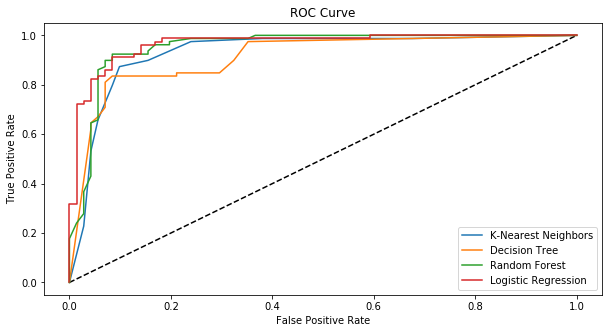

In [87]:
models = ["K-Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression"]
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label=models[0])
plt.plot(fpr_dt, tpr_dt, label=models[1])
plt.plot(fpr_rf, tpr_rf, label=models[2])
plt.plot(fpr_lr, tpr_lr, label=models[3])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Let's calculate the areas under the ROC curves for each model. The purpose here is to compare the threshold invariant performance metrics of each classiffication models. 

The ROC curves will be calculated based on dedicated X_test dataset which model has not seen during the training. The AUC scores will be calculated using the y_test labels, belonging to the X_test features, and predicted labels by the models. 

In [88]:
y_pred_knn = knn_pipe.predict(X_test)
y_pred_dt = dt_pipe.predict(X_test)
y_pred_rf = rf_pipe.predict(X_test)
y_pred_lr = lr_pipe.predict(X_test)

In [89]:
knn_auc_score = roc_auc_score(y_test, y_pred_knn)
dt_auc_score = roc_auc_score(y_test, y_pred_dt)
rf_auc_score = roc_auc_score(y_test, y_pred_rf)
lr_auc_score = roc_auc_score(y_test, y_pred_lr)
auc_scores = [knn_auc_score, dt_auc_score, rf_auc_score, lr_auc_score]
models = ["K-Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression"]

Now let's calculate the accuracy scores for each model. The accuracy score describes the percentage of correctly identified target labels:

In [90]:
knn_acc_score = accuracy_score(y_test, y_pred_knn)
dt_acc_score = accuracy_score(y_test, y_pred_dt)
rf_acc_score = accuracy_score(y_test, y_pred_rf)
lr_acc_score = accuracy_score(y_test, y_pred_lr)
acc_scores = [knn_acc_score, dt_acc_score, rf_acc_score, lr_acc_score]

Let's put all the scores into a single dataframe for ease of access and comparison

In [91]:
dct = {"AUC": auc_scores,
       "Accuracy": acc_scores}
model_df = pd.DataFrame(dct, index=models)
model_df

,AUC,Accuracy
K-Nearest Neighbors,0.887413,0.886667
Decision Tree,0.863523,0.860000
Random Forest,0.901498,0.900000
Logistic Regression,0.900784,0.900000


Based on values collected in above dataframe, the highest accuracy belongs to Random Forest and Logistic Regression models where 0.9 means that this model correctly predicted 90% of the test dataset instances. The highest AUC on the other hand belongs to Random FOrest model which means that when it comes to distinguishing between the positive and negative classes Random Forest classifier does a better job.

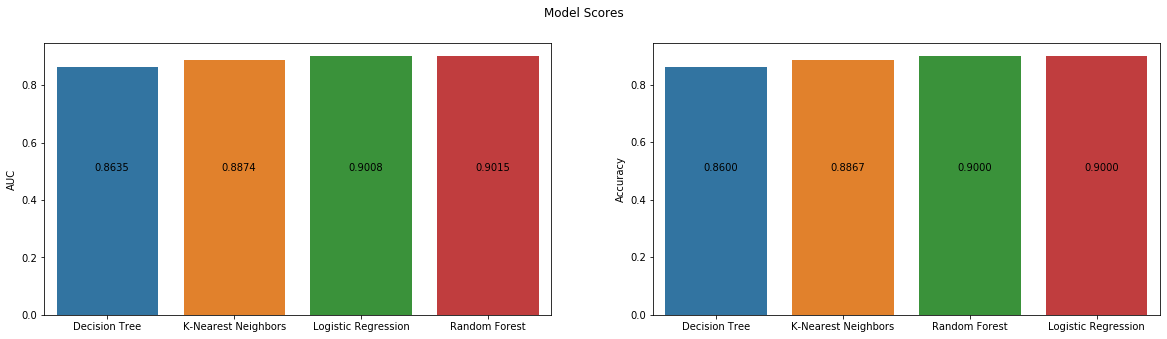

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
fig.suptitle('Model Scores')

ax1 = sns.barplot(ax=axes[0], x=model_df.index, y=model_df["AUC"], order=model_df["AUC"].sort_values().index)

ax2 = sns.barplot(ax=axes[1], x=model_df.index, y=model_df["Accuracy"], order=model_df["Accuracy"].sort_values().index)


ax1.text(-0.1, 0.5, "{:.4f}".format(model_df["AUC"].sort_values()[0]))
ax1.text(0.9, 0.5, "{:.4f}".format(model_df["AUC"].sort_values()[1]))
ax1.text(1.9, 0.5, "{:.4f}".format(model_df["AUC"].sort_values()[2]))
ax1.text(2.9, 0.5, "{:.4f}".format(model_df["AUC"].sort_values()[3]))

ax2.text(-0.1, 0.5, "{:.4f}".format(model_df["Accuracy"].sort_values()[0]))
ax2.text(0.9, 0.5, "{:.4f}".format(model_df["Accuracy"].sort_values()[1]))
ax2.text(1.9, 0.5, "{:.4f}".format(model_df["Accuracy"].sort_values()[2]))
ax2.text(2.9, 0.5, "{:.4f}".format(model_df["Accuracy"].sort_values()[3]))

plt.show()

Based on above mentioned metrics the best performing classification model is Random Forest Classification Model which performed slightly better than the Logistic Regression Model

Similar AUC scores can be obtained by running the cross_val_score which splits the dataset into predefined number of folds and carries out the cross validation of the AUC scores returning AUC scores for each cross-validation in a shapre of an array. If we look at the mean value of that array we can observe similar AUC scores for all models with very close values.

#### NOTE: 

Because running only cross_val_score take 2 minutes and we have 2 minute limit I have included the cross_val_score calculations below in form of a comment. It can be run by decommenting it.

In [93]:
# cv_scores_knn = cross_val_score(knn_pipe, X, y, cv=5, scoring="roc_auc")
# cv_scores_dt = cross_val_score(dt_pipe, X, y, cv=5, scoring="roc_auc")
# cv_scores_rf = cross_val_score(rf_pipe, X, y, cv=5, scoring="roc_auc")
# cv_scores_lr = cross_val_score(lr_pipe, X, y, cv=5, scoring="roc_auc")

In [94]:
# print("KNN Mean AUC score: {}".format(cv_scores_knn.mean()))
# print("DT Mean AUC score: {}".format(cv_scores_dt.mean()))
# print("RF Mean AUC score: {}".format(cv_scores_rf.mean()))
# print("LR Mean AUC score: {}".format(cv_scores_lr.mean()))

<p>
Mean AUC scores for the models are as below:<br>
    <ul>
        <li>KNN Mean AUC score: 0.9036924180410095</li>
        <li>DT Mean AUC score: 0.8730535993740218</li>
        <li>RF Mean AUC score: 0.9218738714337306</li>
        <li>LR Mean AUC score: 0.9201612094217728</li>
    </ul>
</p>

As can be seen above the AUC score pattern is the same Random Forest Model showing the best result and Decision Tree mode showing the worst result. 